In [2]:
from sklearn.datasets import load_digits
mnist = load_digits()
print(mnist.data.shape)
X = mnist.data 
y = mnist.target

(1797, 64)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(1347, 64) (1347,)
(450, 64) (450,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([127, 140, 136, 143, 129, 134, 133, 138, 129, 138]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([51, 42, 41, 40, 52, 48, 48, 41, 45, 42]))


In [9]:
import numpy as np
import scipy.spatial
from collections import Counter
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            #print(votes)    
            ans = Counter(votes).most_common(1)[0][0] # this is a in build method which  return item with frquencey 
            #like [a:3,b:4] formate # we eatracted only first row first value
            final_output.append(ans) # this is a complet scaler single value
            
        return final_output
    # score method
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        c = 0
        for i in range(len(X_test)):
            if(predictions[i] == y_test[i]):
                c = c+1
        return c/len(X_test)
    

In [11]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
    clf = KNN(k)
    clf.fit(X_train, y_train)
#print(X_test)
    prediction = clf.predict(X_test)
    acc = clf.score(X_test,y_test)
    accuracies.append(acc)
    print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9755555555555555
K = 5; Accuracy: 0.9755555555555555
K = 7; Accuracy: 0.9755555555555555
K = 9; Accuracy: 0.9755555555555555
K = 11; Accuracy: 0.9733333333333334
K = 13; Accuracy: 0.9711111111111111
K = 15; Accuracy: 0.9688888888888889
K = 17; Accuracy: 0.9666666666666667
K = 19; Accuracy: 0.9666666666666667
K = 21; Accuracy: 0.9666666666666667
K = 23; Accuracy: 0.9644444444444444
K = 25; Accuracy: 0.9644444444444444
K = 27; Accuracy: 0.9666666666666667
K = 29; Accuracy: 0.9622222222222222
K = 31; Accuracy: 0.96
K = 33; Accuracy: 0.96
K = 35; Accuracy: 0.9577777777777777
K = 37; Accuracy: 0.9577777777777777
K = 39; Accuracy: 0.96
K = 41; Accuracy: 0.9555555555555556
K = 43; Accuracy: 0.9511111111111111
K = 45; Accuracy: 0.9488888888888889
K = 47; Accuracy: 0.9444444444444444
K = 49; Accuracy: 0.9444444444444444
K = 51; Accuracy: 0.9377777777777778
K = 53; Accuracy: 0.9355555555555556
K = 55; Accuracy: 0.9333333333333333
K = 57; Accuracy: 0.9333333333333333
K = 59; Ac

In [12]:
max_index = accuracies.index(max(accuracies))
print(max_index)

0


Text(0, 0.5, 'Accuracy')

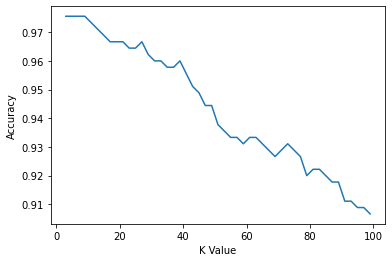

In [13]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [15]:
model = KNN(3) 
model.fit(X_train, y_train) 
pred = model.predict(X_train)
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [1.         0.9929078  1.         1.         1.         1.
 0.98518519 1.         0.9921875  0.99275362]

Recall 
 [1.         1.         1.         1.         1.         0.99253731
 1.         0.99275362 0.98449612 0.99275362]

F-score 
 [1.         0.99644128 1.         1.         1.         0.99625468
 0.99253731 0.99636364 0.98832685 0.99275362]
